In [ ]:
from STMiner.Simulate import Simulator 
from STMiner.SPFinder import SPFinder

sp = SPFinder()
sp.read_h5ad(file='I://GSM6505120_RatColon_FF_wCS_C_e4_processed.h5ad')

In [ ]:
sp.get_genes_csr_array(min_cells=200)
sp.spatial_high_variable_genes()

In [97]:
sp.global_distance

,Gene,Distance
4871,RGD1305645,2.177009e+07
2908,Guca2b,1.957556e+07
7066,Sst,1.790647e+07
6106,Ppy,1.773857e+07
5886,Hic1,1.630852e+07
...,...,...
528,Stard10,1.610227e+05
6237,Mrpl12,1.604160e+05
3706,Degs2,1.553668e+05
5839,Gabarap,1.527753e+05


In [94]:
import pandas as pd

# hk_genes = list(pd.read_csv("C://Users/dell/Downloads/Human_Mouse_Common.csv", sep=";")['Mouse'].values)
n= 0 
for i in list(sp.adata.var.index):
    if i.upper() in hk_genes:
        n+=1
print(n)

918


In [ ]:
hk_genes = list(map(lambda x:x.upper(), hk_genes))

In [83]:
for top in range(500, 4500, 500):
    n = 0
    for i in list(sp.global_distance[:top]['Gene']):
        if i.upper() in hk_genes:
            n += 1
    print(n / top)

0.01
0.015
0.02266666666666667
0.0275
0.038
0.042666666666666665
0.044
0.05325


In [ ]:
import scanpy as sc
adata = sc.read_h5ad('I://V10F24_076_A1_processed.h5ad')
sc.pp.filter_genes(adata, min_cells=200)
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.calculate_qc_metrics(adata)
sc.pp.highly_variable_genes(adata)

In [ ]:
list(range(500, 3100, 500))

In [ ]:
df = adata.var.query('highly_variable==True').sort_values(by='dispersions_norm', ascending=True)

In [ ]:
import hotspot
import scanpy as sc


adata = sc.read_h5ad('I://GSM6505120_RatColon_FF_wCS_C_e4_processed.h5ad')
sc.pp.filter_genes(adata, min_cells=200)
sc.pp.calculate_qc_metrics(adata, inplace=True)
sc.tl.pca(adata, svd_solver='arpack')

hs = hotspot.Hotspot(
    adata,
    model='danb',
    latent_obsm_key="X_pca",
    umi_counts_obs_key="total_counts"
)

hs.create_knn_graph(weighted_graph=False, n_neighbors=50)
hs_results = hs.compute_autocorrelations()

In [ ]:
hs = hs_results.query('Pval<0.05')

In [79]:
for top in range(500, 4100, 500):
    n = 0
    for i in list(hs[:top].index):
        if i.upper() in hk_genes:
            n += 1
    print(n / top)

0.012
0.018
0.024
0.035
0.0476
0.056
0.06542857142857143
0.07475


In [ ]:
adata = sc.read_h5ad('I:/GSM6505120_RatColon_FF_wCS_C_e4_processed.h5ad')
adata

In [ ]:
import NaiveDE
import SpatialDE
import scanpy as sc
import numpy as np
import pandas as pd


adata = sc.read_h5ad('I:/GSM6505120_RatColon_FF_wCS_C_e4_processed.h5ad')
sc.pp.filter_genes(adata, min_cells=200)
sc.pp.calculate_qc_metrics(adata)
adata.obs['x'] = adata.obsm['spatial'][:, 0]
adata.obs['y'] = adata.obsm['spatial'][:, 1]

exp_df = pd.DataFrame(adata.X.todense(), index=adata.obs.index, columns=adata.var.index)
norm_expr = NaiveDE.stabilize(exp_df.T).T
resid_expr = NaiveDE.regress_out(adata.obs, norm_expr.T, 'np.log(total_counts)').T
print(len(adata.var))
sample_resid_expr = resid_expr.sample(n=len(adata.var), axis=1, random_state=1)
X = adata.obs[['x', 'y']]

results = SpatialDE.run(np.array(X), sample_resid_expr)
sign_results = results.query('qval < 0.05')
sign_results = sign_results.sort_values(by=['FSV'], ascending=False)


In [78]:
sig = sign_results.query('qval < 0.05')
for top in range(500, 3200, 500):
    n = 0
    for i in list(sig[:top]['g']):
        if i.upper() in hk_genes:
            n += 1
    print(n / top)

0.092
0.09
0.07133333333333333
0.0705
0.0772
0.08866666666666667


In [80]:
list(range(500, 3200, 500))

[500, 1000, 1500, 2000, 2500, 3000]

In [ ]:
for i in list(sp.adata.var.index):
    if i.upper() in list(hk['Gene.name']):
        print(i)

In [ ]:
from STMiner.Algorithm.distance import get_exp_array

# 'sgk1' is normal
arr_li = []
for i in ['pax3a', 'mbpa', 'tnnt2a', 'ponzr4', 'pvalb2',
          'rpl13', 'rpl22', 'nap1l1', 'ndufa5', 'gabarapl2']:
    arr_li.append(get_exp_array(sp.adata, i))

sim = Simulator(arr_li)

In [ ]:
sim.set_noise_type(noise_type='undersampling', noise_argument=0.1)
a = sim.generate(offset_radius=3, count=100, add_noise=False, offset_probability=0.2)

In [ ]:
sp.set_adata(a)

In [ ]:
sp.get_genes_csr_array(min_cells=10)
sp.spatial_high_variable_genes()

In [ ]:
import hotspot

In [ ]:
import scanpy as sc
a = sc.read_h5ad('I://GSM5621978_V10F24-110_B1_processed.h5ad')
sc.pp.filter_genes(a, min_cells=200)
sc.pp.calculate_qc_metrics(a, inplace=True)
sc.tl.pca(a, svd_solver='arpack')

In [ ]:
sc.pp.highly_variable_genes(a)

In [ ]:
seruat = a.var.query('highly_variable==True').sort_values(by='dispersions_norm',ascending=False)

In [ ]:
# %%
hs = hotspot.Hotspot(
    a,
    model='danb',
    latent_obsm_key="X_pca",
    umi_counts_obs_key="total_counts"
)

In [ ]:
hs.create_knn_graph(weighted_graph=False, n_neighbors=50)
hs_results = hs.compute_autocorrelations()

In [98]:
hs_results

,C,Z,Pval,FDR
Gene,,,,
Igfbp2,0.822833,187.380775,0.000000,0.000000
Pcp4,0.784877,179.964485,0.000000,0.000000
Des,0.825911,177.134289,0.000000,0.000000
Cnn1,0.813445,162.932662,0.000000,0.000000
Tagln,0.839526,155.138031,0.000000,0.000000
...,...,...,...,...
Vps35l,-0.008751,-1.217018,0.888201,0.888637
Rufy1,-0.009469,-1.312034,0.905246,0.905579
Tmem185a,-0.008713,-1.336021,0.909229,0.909452


In [ ]:
import pandas as pd

hk_genes = list(pd.read_csv("I:\MostStable_Mouse.csv", sep=";")['Gene.name'])
hk_genes

In [95]:

918/8154


0.11258278145695365

In [88]:
df = adata.var.query('highly_variable==True').sort_values(by='dispersions_norm')
df

,gene_ids,feature_types,genome,mito,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,highly_variable,means,dispersions,dispersions_norm,n_cells
Pcp4l1,ENSRNOG00000003209,Gene Expression,Rnor6.0ERCC-ensembl98,False,281,0.160132,0.148534,80.660702,232.672318,5.453920,True,0.249615,0.832329,0.982217,281
Slc30a4,ENSRNOG00000000170,Gene Expression,Rnor6.0ERCC-ensembl98,False,717,0.423073,0.352819,50.653820,614.725342,6.422801,True,0.579028,1.030521,0.982240,717
Mapk6,ENSRNOG00000009381,Gene Expression,Rnor6.0ERCC-ensembl98,False,1006,0.821838,0.599846,30.763937,1194.129883,7.086010,True,1.069548,1.147774,0.982992,1006
Sesn3,ENSRNOG00000008173,Gene Expression,Rnor6.0ERCC-ensembl98,False,241,0.107718,0.102302,83.413627,156.513519,5.059511,True,0.159724,0.833269,0.983954,241
Trim23,ENSRNOG00000012354,Gene Expression,Rnor6.0ERCC-ensembl98,False,290,0.135284,0.126883,80.041294,196.567642,5.286081,True,0.201044,0.833422,0.984236,290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Calb2,ENSRNOG00000016977,Gene Expression,Rnor6.0ERCC-ensembl98,False,333,0.249118,0.222438,77.081900,361.968567,5.894316,True,0.641288,3.393746,8.924235,333
Vip,ENSRNOG00000018808,Gene Expression,Rnor6.0ERCC-ensembl98,False,313,0.204933,0.186424,78.458362,297.767273,5.699665,True,0.587471,4.195759,9.780398,313
Hba-a2,ENSRNOG00000047321,Gene Expression,Rnor6.0ERCC-ensembl98,False,486,0.395049,0.332929,66.551961,574.005676,6.354380,True,1.115862,4.501708,10.626289,486
Ghrl,ENSRNOG00000010349,Gene Expression,Rnor6.0ERCC-ensembl98,False,685,0.523460,0.420984,52.856160,760.587097,6.635405,True,1.338602,5.952095,11.009466,685


In [89]:
for top in [500,1000]:
    n = 0
    for i in list(df[:top].index):
        if i.upper() in hk_genes:
            n += 1
    print(n / top)

0.062
0.06


In [ ]:
hk_genes = list(pd.read_csv("C://Users/dell/Downloads/Human_Mouse_Common.csv", sep=";")['Mouse'].values)

In [ ]:
import NaiveDE
import SpatialDE
import scanpy as sc
import numpy as np
import pandas as pd


adata = sc.read_h5ad('I://zebrafish/10X_Visium_hunter2021spatially_sample_C_data.h5ad')
sc.pp.filter_genes(adata, min_cells=200)
sc.pp.calculate_qc_metrics(adata, inplace=True)
adata.obs['x'] = adata.obsm['spatial'][:, 0]
adata.obs['y'] = adata.obsm['spatial'][:, 1]

exp_df = pd.DataFrame(adata.X.todense(), index=adata.obs.index, columns=adata.var.index)
norm_expr = NaiveDE.stabilize(exp_df.T).T
resid_expr = NaiveDE.regress_out(adata.obs, norm_expr.T, 'np.log(total_counts)').T
sample_resid_expr = resid_expr.sample(n=6262, axis=1, random_state=1)
X = adata.obs[['x', 'y']]

results = SpatialDE.run(np.array(X), sample_resid_expr)
sign_results = results.query('qval < 0.05')
sign_results = sign_results.sort_values(by=['FSV'], ascending=False)


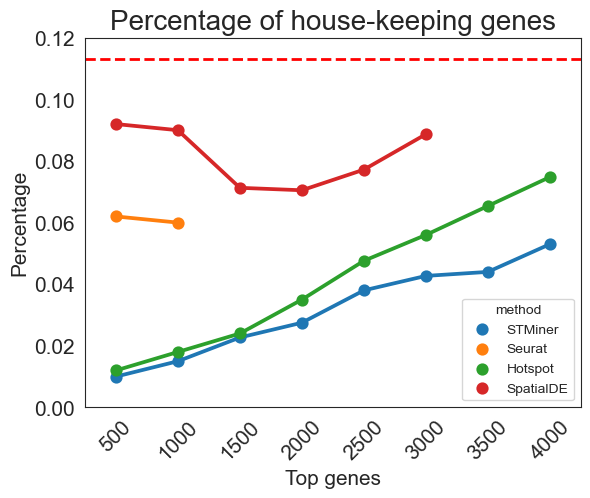

In [96]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

d = {'method': ['STMiner', 'STMiner', 'STMiner', 'STMiner', 'STMiner', 'STMiner', 'STMiner', 'STMiner',
                'Seurat', 'Seurat',
                'Hotspot', 'Hotspot', 'Hotspot', 'Hotspot', 'Hotspot', 'Hotspot', 'Hotspot', 'Hotspot',
                'SpatialDE', 'SpatialDE', 'SpatialDE', 'SpatialDE', 'SpatialDE', 'SpatialDE'
                ],
     'Percentage': [0.01, 0.015, 0.0227, 0.0275, 0.038, 0.0427, 0.044, 0.053,
                    0.062, 0.06,
                    0.012, 0.018, 0.024, 0.035, 0.0476, 0.056, 0.0654, 0.0748,
                    0.092, 0.09, 0.0713, 0.0705, 0.0772, 0.0887],
     'Top genes': [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000,
                   500, 1000,
                   500, 1000, 1500, 2000, 2500, 3000, 3500, 4000,
                   500, 1000, 1500, 2000, 2500, 3000]}
df = pd.DataFrame(d)

sns.pointplot(df, x='Top genes', y='Percentage', hue='method')
plt.axhline(y=0.113, color='red', linestyle='--', linewidth=2, label='Horizontal Line')
plt.ylim(0, 0.12)
plt.title('Percentage of house-keeping genes', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(rotation=45, fontsize=15)
plt.xlabel('Top genes', fontsize=15)
plt.ylabel('Percentage', fontsize=15)
sns.set_style("white")

plt.savefig('./percentage_of_hk.eps', format='eps', dpi=500)

In [ ]:
hs_genes = hs_results[:500].index
n = 0
hs_genes_uppercase_list = [element.upper() for element in hs_genes]
for i in list(hs_genes_uppercase_list):
    if i in hk_list:
        n += 1
        print(n)

In [ ]:
from STMiner import SPFinder

sp = SPFinder()
sp.read_h5ad(file='I://zebrafish/10X_Visium_hunter2021spatially_sample_C_data.h5ad', bin_size=1)
sp.get_genes_csr_array(min_cells=200, log1p=False)
sp.spatial_high_variable_genes()

In [ ]:
import scanpy as sc 
adata = sc.read_h5ad('I://zebrafish/10X_Visium_hunter2021spatially_sample_C_data.h5ad')
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata)

In [ ]:
import hotspot
import scanpy as sc


adata = sc.read_h5ad('I://zebrafish/10X_Visium_hunter2021spatially_sample_C_data.h5ad')
sc.pp.filter_genes(adata, min_cells=200)
sc.pp.calculate_qc_metrics(adata, inplace=True)
sc.tl.pca(adata, svd_solver='arpack')

hs = hotspot.Hotspot(
    adata,
    model='danb',
    latent_obsm_key="X_pca",
    umi_counts_obs_key="total_counts"
)

hs.create_knn_graph(weighted_graph=False, n_neighbors=50)
hs_results = hs.compute_autocorrelations()

In [ ]:
hs_results.query('Pval<0.05')

In [ ]:
adata.var.query('highly_variable==True')

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

d = {'method': ['STMiner', 'STMiner', 'STMiner', 'STMiner', 'STMiner', 'STMiner', 'STMiner', 'STMiner', 'STMiner',
                'STMiner',
                'Seurat', 'Seurat', 'Seurat', 'Seurat', 'Seurat', 'Seurat', 
                'Hotspot', 'Hotspot', 'Hotspot', 'Hotspot', 'Hotspot', 'Hotspot', 'Hotspot', 'Hotspot', 'Hotspot',
                'Hotspot',
                'SpatialDE', 'SpatialDE', 'SpatialDE', 'SpatialDE', 'SpatialDE', 'SpatialDE', 'SpatialDE', 'SpatialDE',
                'SpatialDE', 'SpatialDE'],
     'Percentage': [8 / 500, 33 / 1000, 84 / 1500, 164 / 2000, 248 / 2500, 353 / 3000, 449 / 3500, 560 / 4000,
                    670 / 4500, 782 / 5000,
                    14 / 500, 37 / 1000, 104 / 1500, 192 / 2000, 269 / 2500, 377 / 3000,
                    51 / 500, 118 / 1000, 194 / 1500, 272 / 2000, 356 / 2500, 446 / 3000, 558 / 3500, 641 / 4000,
                    732 / 4500, 840 / 5000,
                    47 / 500, 118 / 1000, 200 / 1500, 267 / 2000, 354 / 2500, 463 / 3000, 561 / 3500, 656 / 4000,
                    749 / 4500, 849 / 5000],
     'Top genes': [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000,
                   500, 1000, 1500, 2000, 2500, 3000,
                   500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000,
                   500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]}
df = pd.DataFrame(d)

sns.pointplot(df, x='Top genes', y='Percentage', hue='method')
plt.axhline(y=0.179, color='red', linestyle='--', linewidth=2, label='Horizontal Line')
plt.ylim(0, 0.2)
plt.title('Percentage of house-keeping genes', fontsize=20)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.xticks(rotation=45, fontsize=15)
plt.xlabel('Top genes', fontsize=15)
plt.ylabel('Percentage', fontsize=15)
sns.set_style("white")

plt.savefig('./percentage_of_hk.eps', format='eps', dpi=500)

In [ ]:
import matplotlib.pyplot as plt

df['pattern'] = df[1].apply(lambda x: x.split('_')[1])
sns.barplot(df, x='pattern', y=2, order=['P0', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9'])
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.ylabel('Spatial Variance level')
plt.savefig('SpatialVariancelevel.eps', format='eps', dpi=500)